Total CNS Satellites: 201
Average Altitude: 67258 km
Average Inclination: 63.4 degrees
Constellations Analyzed: 5

Constellation Details:
- GPS: 39 satellites, 252000 km altitude, 55° inclination, Role: Navigation
- GLONASS: 34 satellites, 39140 km altitude, 64.8° inclination, Role: Navigation
- Galileo: 27 satellites, 23222 km altitude, 56° inclination, Role: Navigation
- BeiDou: 35 satellites, 21150 km altitude, 55° inclination, Role: Navigation
- Iridium (ADS-B): 66 satellites, 780 km altitude, 86.4° inclination, Role: Surveillance/Comm


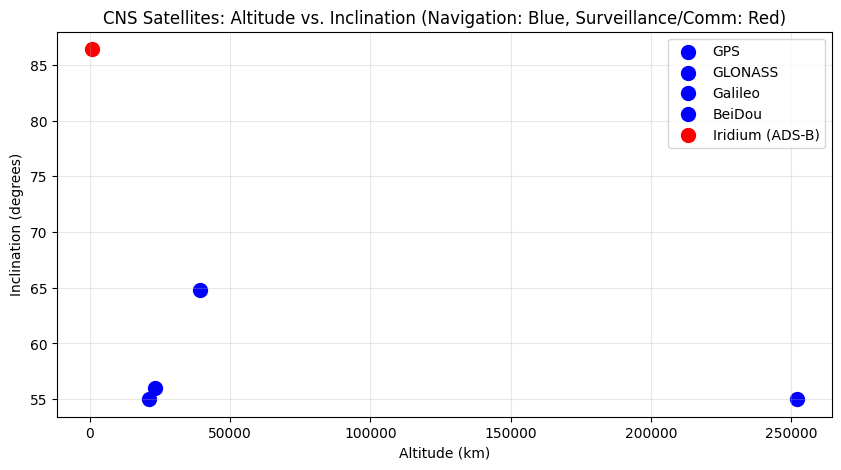

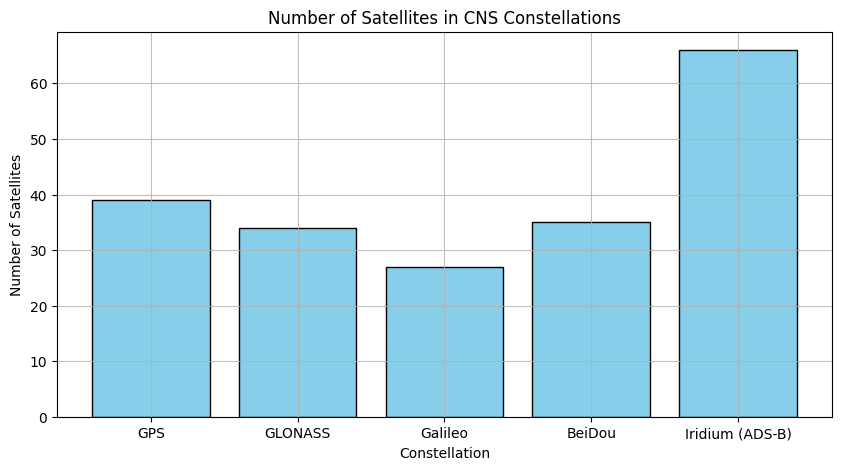

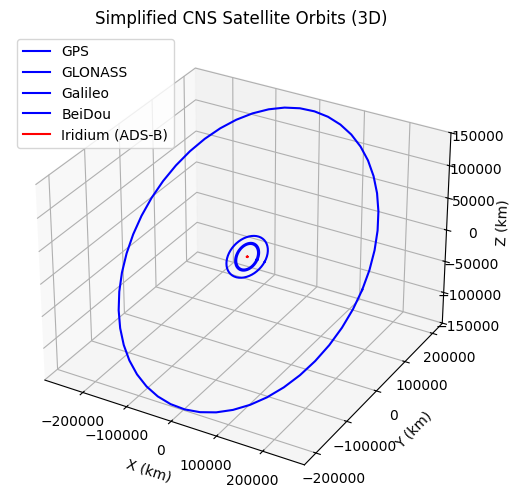

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# CNS satellite data (GNSS constellations: GPS, GLONASS, Galileo, BeiDou)
# Data from NASA, EUROCONTROL, and Wikipedia[](https://www.earthdata.nasa.gov/data/space-geodesy-techniques/gnss)[](https://en.wikipedia.org/wiki/Satellite_navigation)
satellites = [
    {'name': 'GPS', 'count': 39, 'altitude_km': 252000, 'inclination_deg': 55, 'role': 'Navigation'},
    {'name': 'GLONASS', 'count': 34, 'altitude_km': 39140, 'inclination_deg': 64.8, 'role': 'Navigation'},
    {'name': 'Galileo', 'count': 27, 'altitude_km': 23222, 'inclination_deg': 56, 'role': 'Navigation'},
    {'name': 'BeiDou', 'count': 35, 'altitude_km': 21150, 'inclination_deg': 55, 'role': 'Navigation'},
    {'name': 'Iridium (ADS-B)', 'count': 66, 'altitude_km': 780, 'inclination_deg': 86.4, 'role': 'Surveillance/Comm'},
]

# Extract data for analysis
names = [s['name'] for s in satellites]
counts = np.array([s['count'] for s in satellites])
altitudes = np.array([s['altitude_km'] for s in satellites])
inclinations = np.array([s['inclination_deg'] for s in satellites])
roles = [s['role'] for s in satellites]

# Summary statistics
print(f"Total CNS Satellites: {np.sum(counts)}")
print(f"Average Altitude: {np.mean(altitudes):.0f} km")
print(f"Average Inclination: {np.mean(inclinations):.1f} degrees")
print(f"Constellations Analyzed: {len(satellites)}")
print("\nConstellation Details:")
for s in satellites:
    print(f"- {s['name']}: {s['count']} satellites, {s['altitude_km']} km altitude, "
          f"{s['inclination_deg']}° inclination, Role: {s['role']}")

# Plot 1: Scatter plot of altitude vs. inclination
plt.figure(figsize=(10, 5))
colors = ['blue' if 'Navigation' in r else 'red' for r in roles]
for i, name in enumerate(names):
    plt.scatter(altitudes[i], inclinations[i], c=colors[i], s=100, label=name)
plt.xlabel('Altitude (km)')
plt.ylabel('Inclination (degrees)')
plt.title('CNS Satellites: Altitude vs. Inclination (Navigation: Blue, Surveillance/Comm: Red)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot 2: Histogram of satellites per constellation
plt.figure(figsize=(10, 5))
plt.bar(names, counts, color='skyblue', edgecolor='black')
plt.xlabel('Constellation')
plt.ylabel('Number of Satellites')
plt.title('Number of Satellites in CNS Constellations')
plt.grid(True, alpha=0.8)
plt.show()

# Plot 3: 3D orbital positions simplified (approximated as circular orbits)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for i, sat in enumerate(satellites):
    # Approximate satellite positions in a circular orbit
    theta = np.linspace(0, 2 * np.pi, 50)
    x = sat['altitude_km'] * np.cos(theta)  # Simplified x-coordinate
    y = sat['altitude_km'] * np.sin(theta) * np.sin(np.radians(sat['inclination_deg']))  # y with inclination
    z = sat['altitude_km'] * np.sin(theta) * np.cos(np.radians(sat['inclination_deg']))  # z with inclination
    ax.plot(x, y, z, label=sat['name'], color=colors[i])
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Simplified CNS Satellite Orbits (3D)')
plt.legend()
plt.show()